By Prof. Seungchul Lee  
http://iai.postech.ac.kr/  
Industrial AI Lab at POSTECH  
(Translate to R by Gwangil Seo)

Table of Contents

   * [1. Fourier Series](#1.-Fourier-Series)
      + [1.1. Delta Dirac Function](#1.1.-Delta-Dirac-Function)
      + [1.2. Square Wave](#1.2.-Square-Wave)
      + [1.3. How to Decompose a Singal into Fundamental Harmonic Sinusids](#1.3.-How-to-Decompose-a-Singal-into-Fundamental-Harmonic-Sinusids)
   * <a href="#2.-Signal-Representation-(optional)">2. Signal Representation (optional)</a>
      + [2.1. Basis](#2.1.-Basis)
         - [2.1.1. Orthonormal Basis](#2.1.1.-Orthonormal-Basis)
         - [2.1.2. Signal Representation by Orthonormal Basis](#2.1.2.-Signal-Representation-by-Orthonormal-Basis)
      + [2.2. Harmonic Sinusoids are an Orthonomal Basis](#2.2.-Harmonic-Sinusoids-are-an-Orthonomal-Basis)
   * <a href="#3.-Discrete-Fourier-Transformation(DFT)">3. Discrete Fourier Transformation(DFT)</a>
      + <a href="#3.1.-Fast-Fourier-Transformation(FFT)">3.1. Fast Fourier Transformation(FFT)</a>
      + [3.2. DFT Frequencies](#3.2.-DFT-Frequencies)
   * [4. Filtering in Frequency Domain](#4.-Filtering-in-Frequency-Domain)
      + [4.1. Filters](#4.1.-Filters)
      + [4.2. FFT and Convolution](#4.2.-FFT-and-Convolution)


## 1. Fourier Series

### 1.1. Delta Dirac Function
$$
\sum_{n=1,2,3,...} \text{cos}(n\theta) = \text{cos}\theta\ +\text{cos}2\theta\ +\text{cos}3\theta\ +\ ...
$$

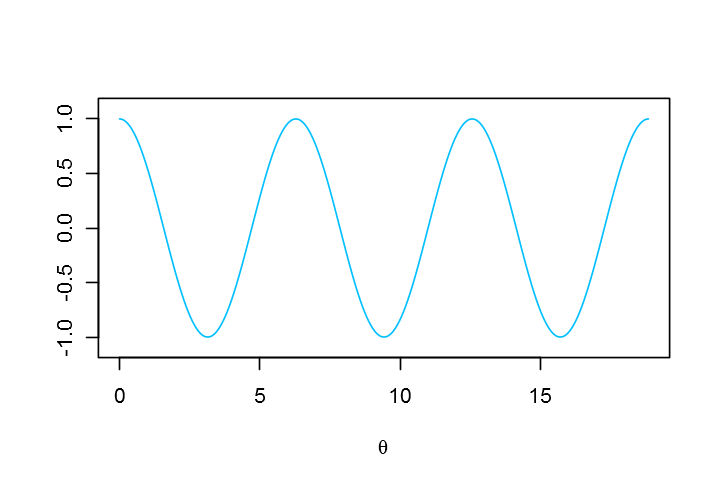

In [1]:
theta = seq(0, 6 * pi, length.out = 2 ^ 8)
x1 <- cos(theta)

options(repr.plot.width=6, repr.plot.height=4)
plot(theta, x1, type = 'l', col = 'deepskyblue', lwd = 1, xlab = expression(theta), ylab = '', ylim = c(-1.1, 1.1))

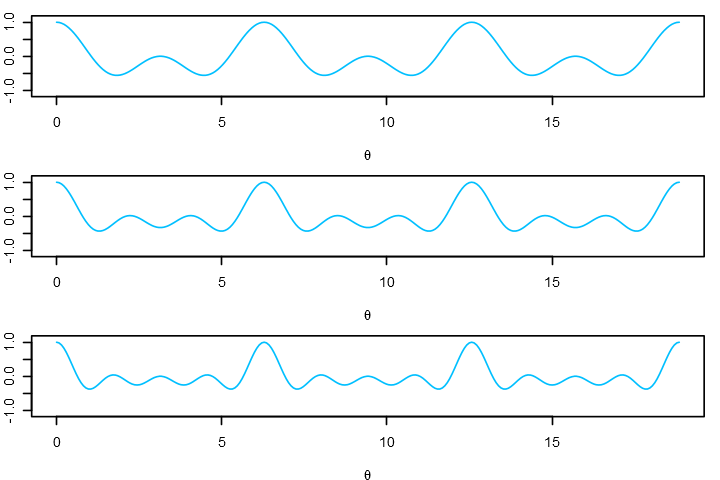

In [2]:
x2 <- x1 + cos(2 * theta)
x3 <- x2 + cos(3 * theta)
x4 <- x3 + cos(4 * theta)

par(mfrow = c(3, 1), mar = c(4, 2, 1, 1))
plot(theta, x2 / 2, type = 'l', col = 'deepskyblue', lwd = 1, xlab = expression(theta), ylab = '', ylim = c(-1.1, 1.1))
plot(theta, x3 / 3, type = 'l', col = 'deepskyblue', lwd = 1, xlab = expression(theta), ylab = '', ylim = c(-1.1, 1.1))
plot(theta, x4 / 4, type = 'l', col = 'deepskyblue', lwd = 1, xlab = expression(theta), ylab = '', ylim = c(-1.1, 1.1))

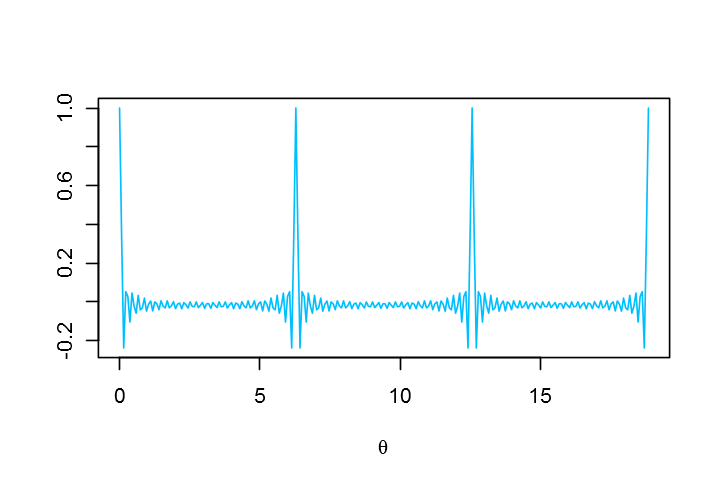

In [3]:
x <- rep(0, 2 ^ 8)

N <- 30
for (n in 1:N) {
  x <- x + cos(n * theta)
}

plot(theta, x / N, type = 'l', col = 'deepskyblue', lwd = 1, xlab = expression(theta), ylab = '')

### 1.2. Square Wave

$$
\sum_{n=1,3,5,...}{4 \over \pi n}\text{sin}(n\theta) = {4 \over \pi}\text{sin}\theta\ +\ {4 \over 3\pi}\text{sin}3\theta\ +\ {4 \over 5\pi}\text{sin}5\theta\ +\ ...
$$

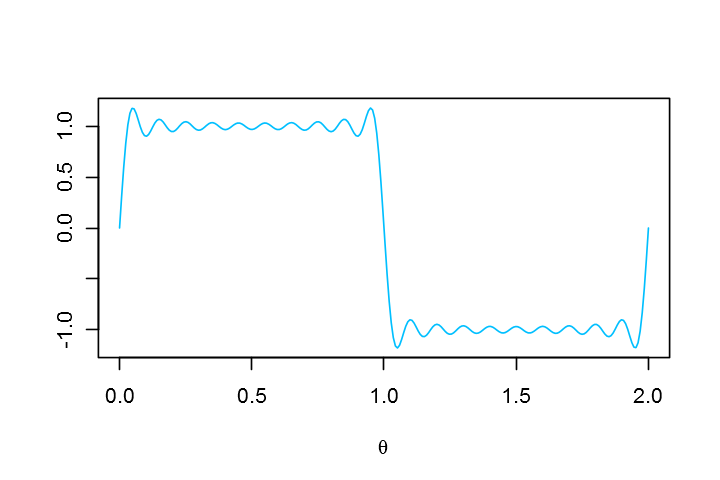

In [4]:
N <- 2 ^ 8
x <- rep(0, N)
theta <- seq(0, 2 * pi, length.out = N)

for (n in seq(1, 20, 2)){
  x <- x + 4 / (pi * n) * sin(n * theta)
}

plot(theta / pi, x, type = 'l', col = 'deepskyblue', lwd = 1, xlab = expression(theta), ylab = '')

<h3>1.3. How to Decompose a Singal into Fundamental Harmonic Sinusids</h3>
<ul>
<li>DFT or FFT can do such a job !!!</li>
</ul>
<center>
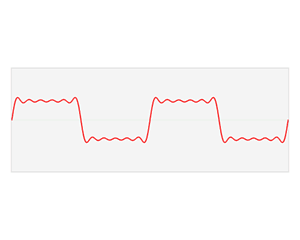
</center>

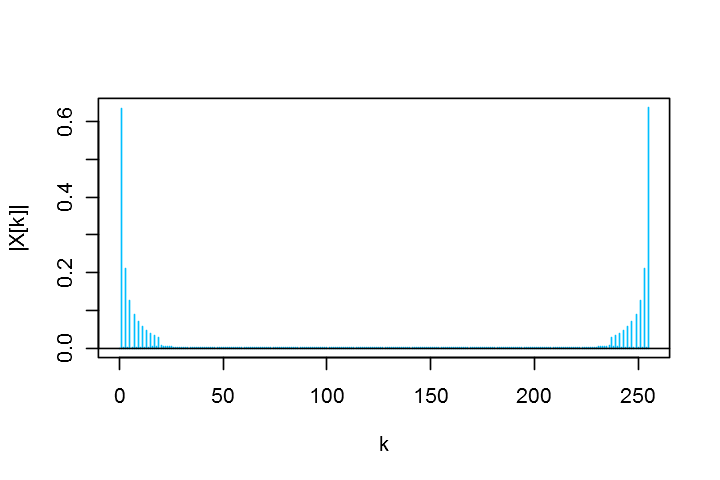

In [5]:
xt <- fft(x, N) / N
plot(0:(N - 1), abs(xt), pch = "", xlab = 'k', ylab = '|X[k]|')
arrows(x0 = 0:(N - 1), y0 = 0, x1 = 0:(N - 1), y1 = abs(xt), col = 'deepskyblue', length = 0, angle = 0, lwd = 1)
abline(h = 0)

$$
\sum_{n=1,3,5,...}{4 \over \pi n}\text{sin}(n\theta) = {4 \over \pi}\text{sin}\theta\ +\ {4 \over 3\pi}\text{sin}3\theta\ +\ {4 \over 5\pi}\text{sin}5\theta\ +\ ...
$$

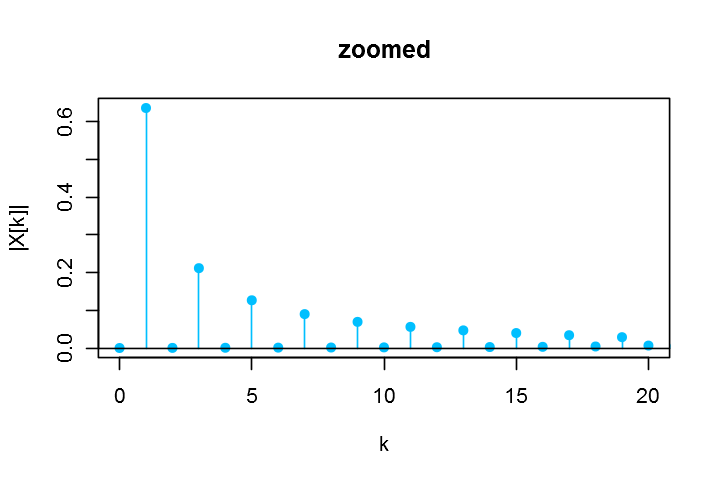

In [6]:
plot(0:(N - 1), abs(xt), pch = 16, xlab = 'k', ylab = '|X[k]|', main = 'zoomed', xlim = c(0, 20), col = 'deepskyblue')
arrows(x0 = 0:(N - 1), y0 = 0, x1 = 0:(N - 1), y1 = abs(xt), col = 'deepskyblue', length = 0, angle = 0, lwd = 1)
abline(h = 0)

## 2. Signal Representation (optional)

### 2.1. Basis

A __basis__ $\{b_k\}$ for a vector space $V$ is a collection of vectors from $V$ that linearly independent and span $V$

 * Basis matrix: stack the basis vectors $b_k$ as columns
 $$ B = \left[b_0\ |\ b_1\ |\ b_2\ |\ ...\ |b_{N-1}\right]
 $$
 * Using this matrix B, we can now write a linear combinataion of basis elements as the matrix/vector product
 
$$
 x = Ba = a_0b_0 + a_1b_1 + ... + a_{N-1}b_{N_1} = \sum_{k=0}^{N-1}a_kb_k \\
 =
\left[b_0\ |\ b_1\ |\ b_2\ |\ ...\ |b_{N-1}\right] \left[ \begin{array} {r} a_0\ \ \\ a_1\ \  \\ \vdots\quad \\ a_{N-1} \end{array} \right] \qquad \qquad \
$$

#### 2.1.1. Orthonormal Basis

 * An __orthogonal basis__ $\{b_k\}_{k=0}^{N-1}$ for a vector space $V$ is a basis whose elements are mutually orthogonal

$$\langle b_k,b_l\rangle \, =\, 0\, \quad k\, \neq\, l$$

 * An __orthonormal basis__ $\{b_k\}_{k=0}^{N-1}$ for a vector space $V$ is a basis whose elements are mutually orghogonal and normalized (in the 2-norm)
 
$$
\begin{align*}
\langle b_k,b_l\rangle \, &=\, 0\, \quad k\, \neq\, l, \quad \text{ and}\\
\| b_k\|_2 \, &= \, 1 \quad \forall k
\end{align*}
$$

 * $B$is a unitrary matrix
 
$$B^H B = I \implies B^{-1} = B^H, \qquad \text{where } B^H \text{ is complex conjugate transpose}$$
$$
\begin{align*}
B^H B = \begin{bmatrix}
b_0^H\\
b_1^H\\
\vdots\\
b_{N-1}^H
\end{bmatrix} \left[b_0 \mid b_1 \mid b_2 \mid \cdots \mid b_{N-1} \right]
\end{align*} = 
\begin{bmatrix}
1 & \\
 & 1\\
 & & \ddots\\
 &  &  & 1
\end{bmatrix}
$$

#### 2.1.2. Signal Representation by Orthonormal Basis

Single representation for any signal $x$
$$
\begin{align*}
x &= B\alpha = \sum_{k=0}^{N-1}\alpha_kb_k,  &\text{(synthesis)}\\ \\
\alpha &= B^Hx \qquad \text{or} \qquad \alpha_k = \langle x,b_k \rangle, &\text{(analysis)}
\end{align*}
$$
 * __Synthesis__: Build up the signal $x$ as a linear combination of the basis elements $b_k$ weighted by the weights $\alpha_k$
 
 * __Analysis__: Compute the weights $\alpha_k$ such that the synthesis produces $x$; the weight $\alpha_k$ measures the similarity between $x$ and the basis element $b_k$
 
### 2.2. Harmonic Sinusoids are an Orthonomal Basis
Stack $N$ normalized harmonic sinusoid $\{s_k\}_{k=0}^{N-1}$ as columns into an $N \times N$ complex orthonormal basis matrix

$$
\begin{align*}
S = \left[s_0 \mid s_1 \mid \cdots \mid s_{N-1} \right] \quad \text{where}\quad s_k[n] = \frac{1}{\sqrt{N}}e^{j\frac{2\pi}{N}kn}
\end{align*}
\\
S^H S = I \implies \langle s_k,s_l\rangle \, =\, 0 \quad k\, \neq l,\quad \text{and}\quad \lVert s_k \rVert_2\, =\, 1
$$

## 3. Discrete Fourier Transformation(DFT)

__DFT__
 * It finds the "frequency contents" at frequency $k$
 * It measures the similarity between $x$ and the harmonic sinusoid $s_k$

$$
\begin{align*}
X\, &=\, S^Hx \\
X[k]\, &=\, \langle x,s_k\rangle\, =\, \sum \limits_{n=0}^{N-1} x[n]\,\frac{e^{-j\frac{2 \pi}{N}kn}}{\sqrt{N}}
\end{align*}
$$

__Inverse DFT__
 * It is returning to time domain
 * It builds up the signal $x$ as a linear combination of $s_k$ weighted by the $X[k]$

$$
\begin{align}
x &= SX \\
x[n] &= \sum_{k=0}^{N-1}X[k]{e^{j{2\pi \over N}kn} \over \sqrt{N}}
\end{align}
$$

__Unnormalized DFT__
 * Normalized forward and inverse DFT

$$
X[k] = \sum_{n=0}^{N-1}x[n]{e^{-j{2\pi \over N}kn} \over \sqrt{N}} \\
x[n] = \sum_{n=0}^{N-1}X[k]{e^{j{2\pi \over N}kn} \over \sqrt{N}}
$$

 * Unnormalized forward and inverse DFT

$$
\begin{align}
X_u[k] &= \sum_{n=0}^{N-1}x[n]e^{-j{2\pi \over N}kn} \\
x[n] &= {1 \over N}\sum_{k=0}^{N - 1}X[k]e^{j{2\pi \over N}kn}
\end{align}
$$

### 3.1. Fast Fourier Transformation(FFT)
 * FFT algorithms are so commonly employed to compute DFT that the term 'FFT' is often used to mean 'DFT'
    + The FFT has been called the "most important computational algorithm of our generation""
    + It uses the dynamic programming algorithm(or divide and conquer) to efficiency compute DFT.
    
 * DFT refers to a mathematical transformation or function, whereas 'FFT' refers to a specific family of algorithms for computing DFTs.
    + use fft command to compute dft
    + fft (computationally efficient)
    
 * We will use the embedded fft function without going too much into detail.

<center>
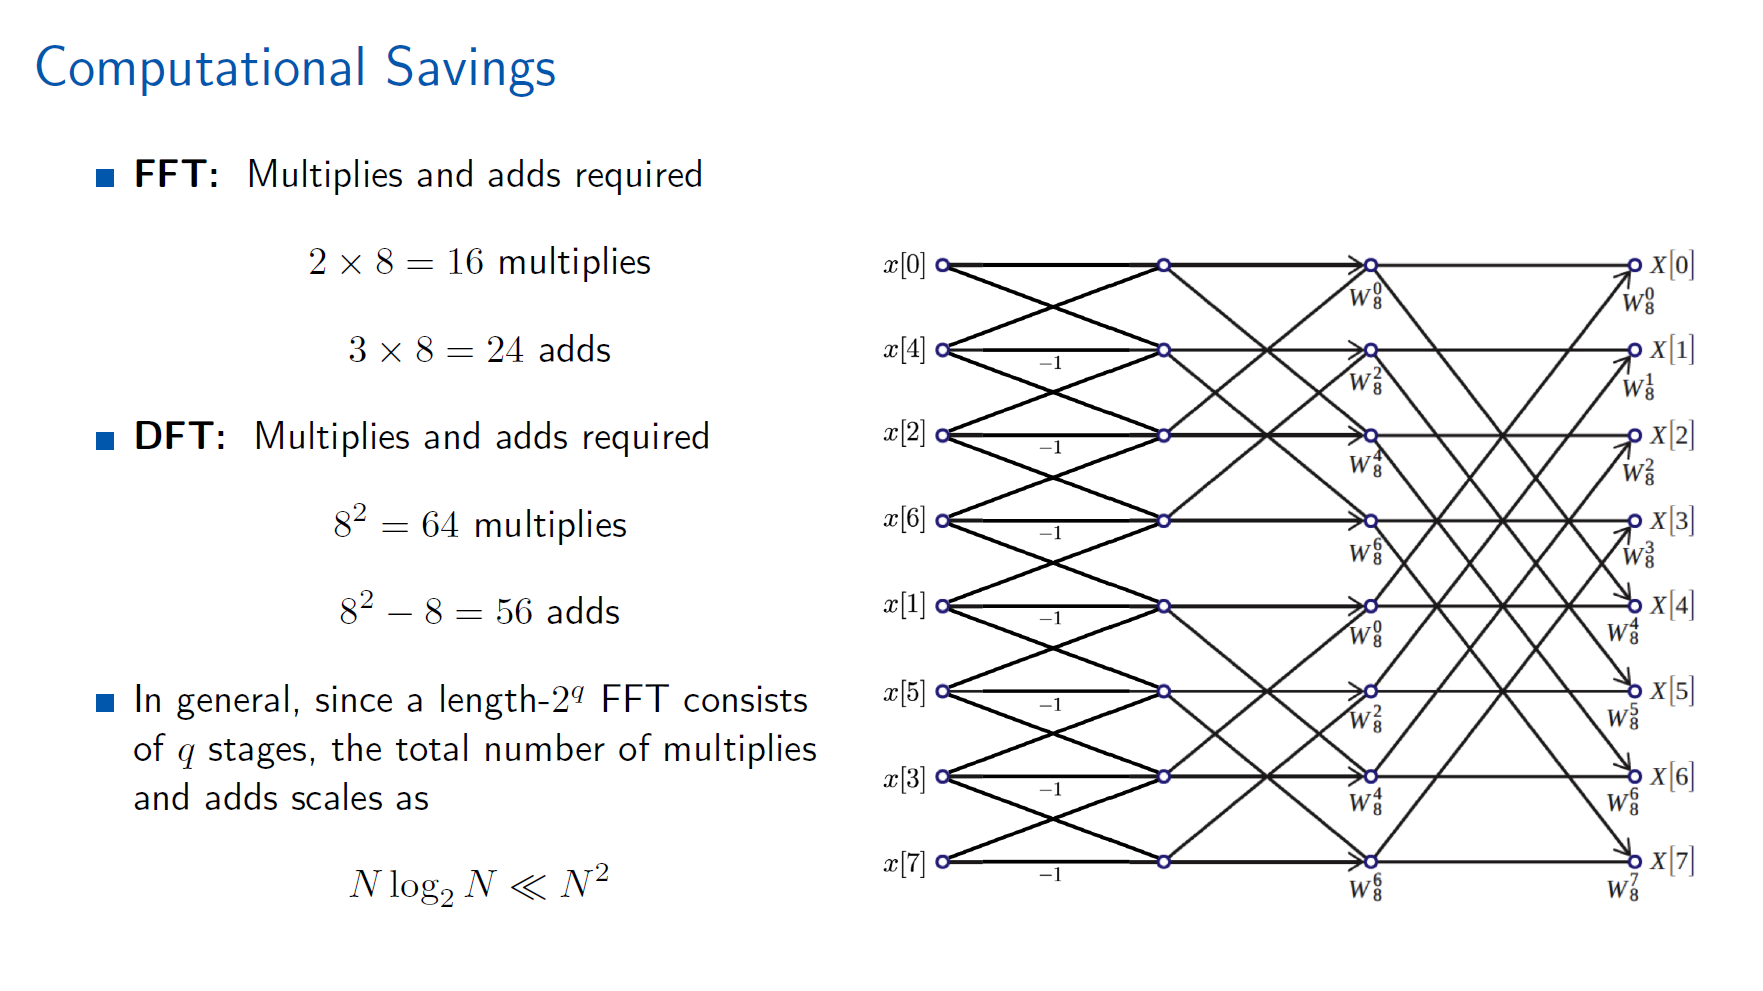
</center>

__Example__
$$x[n] = e^{j{2\pi \over 8}n}$$

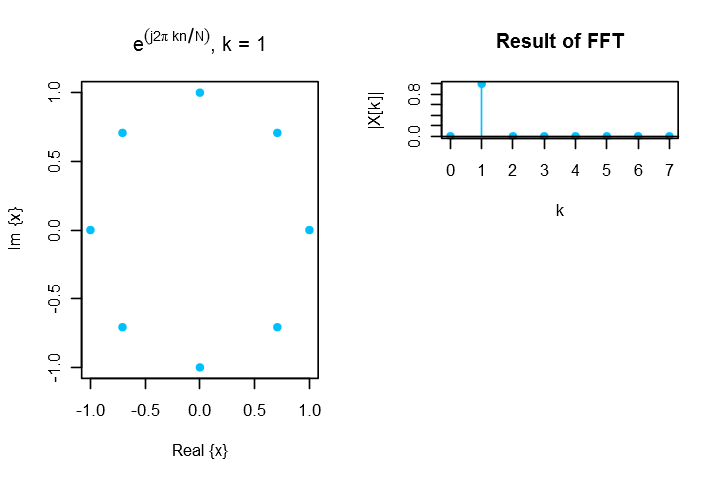

In [7]:
k <- 1
N <- 8
n <- 0:(N - 1)

x <- exp(complex(imaginary = 2 * pi / N * k * n))
xt <- fft(x) / N

layout(matrix(c(1, 1, 2, 0), 2, 2))
plot(Re(x), Im(x), pch = 16, col = 'deepskyblue', cex = 1,
     xlab = 'Real {x}', ylab = 'Im {x}', main = expression(paste(e^(j * 2 * pi * k * n / N), ', k = 1')))

plot(n, abs(xt), pch = 16, col = 'deepskyblue', cex = 1, main = 'Result of FFT', xlab = 'k', ylab = '|X[k]|')
arrows(x0 = n, y0 = 0, x1 = n, y1 = abs(xt), col = 'deepskyblue', length = 0, angle = 0, lwd = 1)
abline(h = 0)

$$x[n] = \text{cos}\left( {2\pi \over 8}n \right)$$

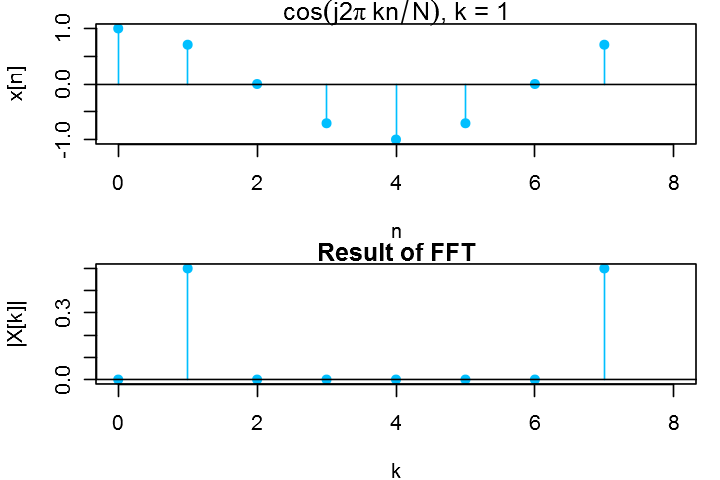

In [8]:
k <- 1
N <- 8
n <- 0:(N - 1)

x <- cos(2 * pi / N * k * n)
xt <- fft(x) / N

par(mfrow = c(2, 1), mar = c(4, 4, 1, 1))
plot(n, x, pch = 16, col = 'deepskyblue', xlim = c(0, 8), main = expression(paste(cos(j * 2 * pi * k * n / N), ', k = 1')),
     xlab = 'n', ylab = 'x[n]')
arrows(x0 = n, y0 = 0, x1 = n, y1 = x, col = 'deepskyblue', length = 0, angle = 0, lwd = 1)
abline(h = 0)

plot(n, abs(xt), pch = 16, col = 'deepskyblue', xlim = c(0, 8), main = 'Result of FFT', xlab = 'k', ylab = '|X[k]|')
arrows(x0 = n, y0 = 0, x1 = n, y1 = abs(xt), col = 'deepskyblue', length = 0, angle = 0, lwd = 1)
abline(h = 0)

* Remember

$$\text{cos}wt = {e^{iwt} + e^{-iwt} \over 2}$$

<center>
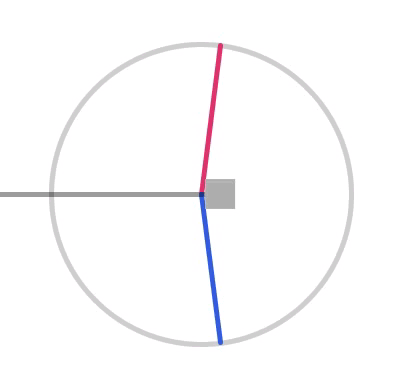
</center>

### 3.2. DFT Frequencies
 * $X[k]$ measures the simmilarity between the time signal $x[n]$ and the harmonic sinusoid $s_k[n]$
 * $X[k]$ measures the "frequency content" of $x[n]$ at frequency
 
$$w_k = {2\pi \over N} k$$

 * Typical interval 1: $0 \leq k \leq N - 1$ corresponds to frequencies $w_k$ in the interval $0 \leq w \leq 2\pi$
 
 * Typical interval 2: $-\frac{N}{2} \leq k \leq \frac{N}{2} -1$ corresponds to frequencies $w_k$ in the interval $-\pi \leq w \leq \pi$


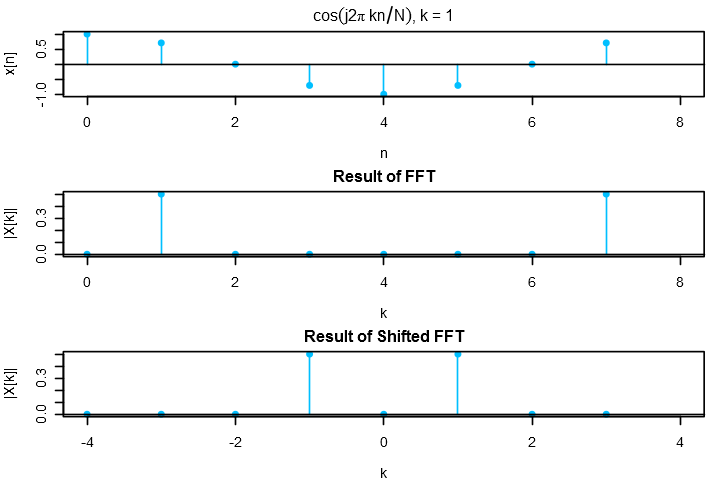

In [9]:
k <- 1  # index for freqeuncy
N <- 8
n <- 0:(N - 1)  # sampling period

x <- cos(2 * pi / N * k * n)  # harmonic complex exponential
xt <- fft(x) / N
fftshift <- function(data) {
  c(tail(data, round(length(data[-1])/2)), head(data, -round(length(data[-1])/2)))
}
xtshift <- fftshift(xt)

kr <- c(seq(0, round(N / 2) - 1), seq(-round(N / 2), -1))
ks <- fftshift(kr)

par(mfrow = c(3, 1), mar = c(4, 4, 2, 1))
plot(n, x, pch = 16, col = 'deepskyblue', xlim = c(0, 8), main = expression(paste(cos(j * 2 * pi * k * n / N), ', k = 1')),
     xlab = 'n', ylab = 'x[n]')
arrows(x0 = n, y0 = 0, x1 = n, y1 = x, col = 'deepskyblue', length = 0, angle = 0, lwd = 1)
abline(h = 0)

plot(n, abs(xt), pch = 16, col = 'deepskyblue', xlim = c(0, 8), main = 'Result of FFT', xlab = 'k', ylab = '|X[k]|')
arrows(x0 = n, y0 = 0, x1 = n, y1 = abs(xt), col = 'deepskyblue', length = 0, angle = 0, lwd = 1)
abline(h = 0)

plot(ks, abs(xtshift), pch = 16, col = 'deepskyblue', xlim = c(-4, 4), main = 'Result of Shifted FFT', xlab = 'k', ylab = '|X[k]|')
arrows(x0 = ks, y0 = 0, x1 = ks, y1 = abs(xtshift), col = 'deepskyblue', length = 0, angle = 0, lwd = 1)
abline(h = 0)

<center>
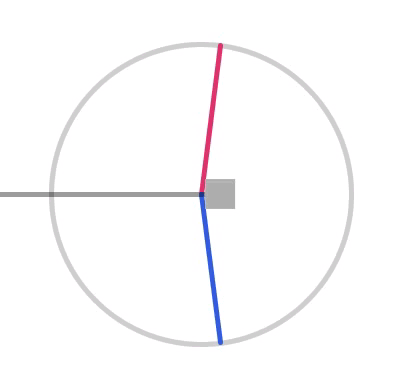
</center>

## 4. Filtering in Frequency Domain

__DFT pair__
$$x[n] \leftrightarrow X[k]$$
__DFT and Convolution__
 * Convolution in the time domain = multiplication in the frequency domain
 
$$
\begin{align}
Y[k] &= H[k]X[k]\\
h[n] \otimes x[n] &\leftrightarrow H[k]X[k]\\
y[n] &= IDFT(Y[k])
\end{align}
$$

<center>
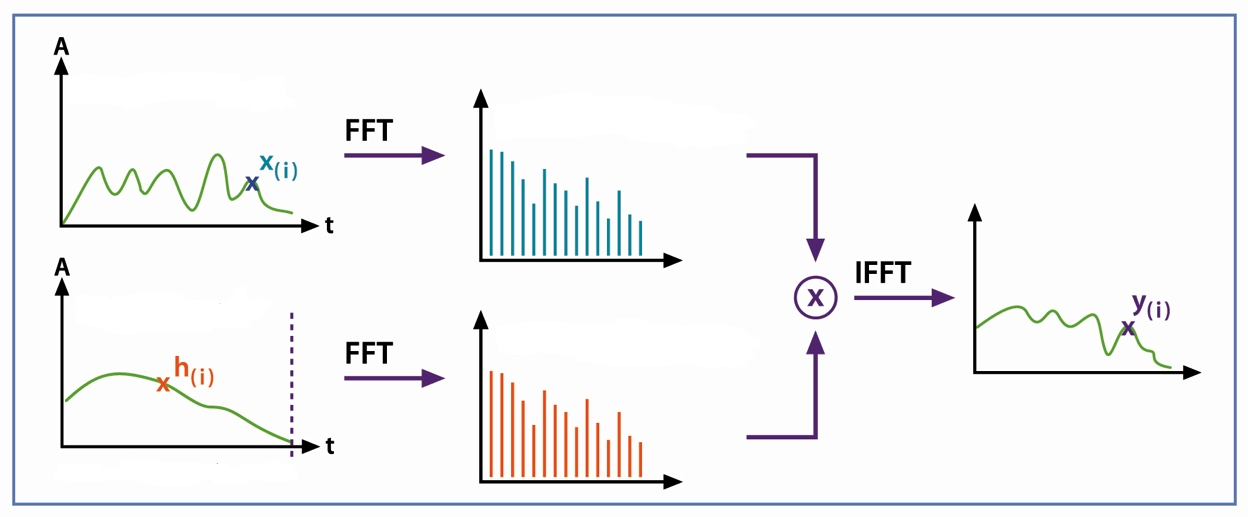
</center>

### 4.1. Filters


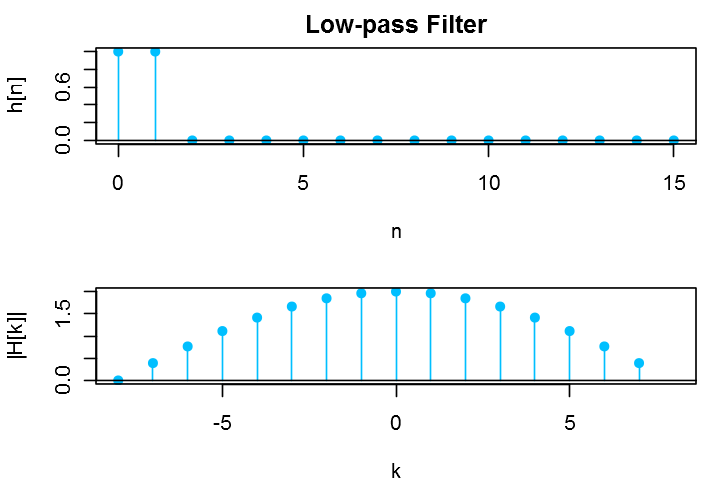

In [10]:
# low-pass filter
N <- 16
n <- 0:(N - 1)

h <- rep(0, N)
h[1] <- 1
h[2] <- 1

kr <- c(seq(0, N / 2 - 1), seq(-N / 2, -1))
ks <- fftshift(kr)

ht <- fft(h)[1:N]  # fft(x, N) in matlab: N-point fft select N-point or padding 0 upto N-point
htshift <- fftshift(ht)

par(mfrow = c(2, 1), mar = c(4, 4, 2, 1))
plot(n, h, pch = 16, col = 'deepskyblue', main = 'Low-pass Filter',
     xlab = 'n', ylab = 'h[n]')
arrows(x0 = n, y0 = 0, x1 = n, y1 = h, col = 'deepskyblue', length = 0, angle = 0, lwd = 1)
abline(h = 0)

plot(ks, abs(htshift), pch = 16, col = 'deepskyblue', xlim = c(-N/2, N/2), xlab = 'k', ylab = '|H[k]|')
arrows(x0 = ks, y0 = 0, x1 = ks, y1 = abs(htshift), col = 'deepskyblue', length = 0, angle = 0, lwd = 1)
abline(h = 0)

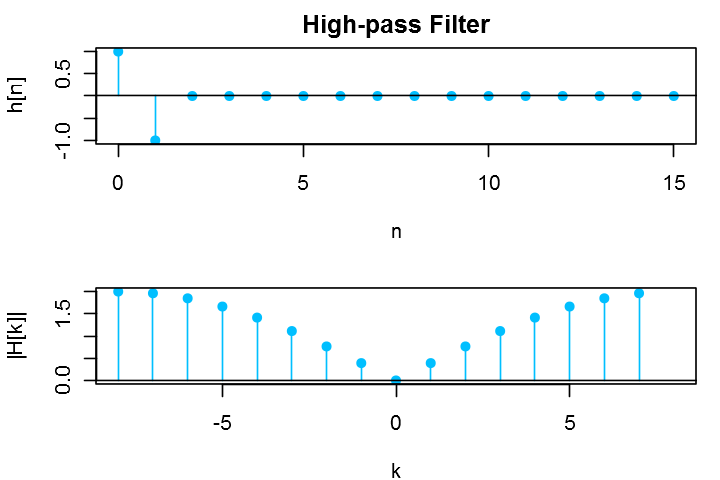

In [11]:
# high-pass filter
N <- 16
n <- 0:(N - 1)

h <- rep(0, N)
h[1] <- 1
h[2] <- -1

kr <- c(seq(0, N / 2 - 1), seq(-N / 2, -1))
ks <- fftshift(kr)

ht <- fft(h)[1:N]  # fft(x, N) in matlab: N-point fft select N-point or padding 0 upto N-point
htshift <- fftshift(ht)

par(mfrow = c(2, 1), mar = c(4, 4, 2, 1))
plot(n, h, pch = 16, col = 'deepskyblue', main = 'High-pass Filter',
     xlab = 'n', ylab = 'h[n]')
arrows(x0 = n, y0 = 0, x1 = n, y1 = h, col = 'deepskyblue', length = 0, angle = 0, lwd = 1)
abline(h = 0)

plot(ks, abs(htshift), pch = 16, col = 'deepskyblue', xlim = c(-N/2, N/2), xlab = 'k', ylab = '|H[k]|')
arrows(x0 = ks, y0 = 0, x1 = ks, y1 = abs(htshift), col = 'deepskyblue', length = 0, angle = 0, lwd = 1)
abline(h = 0)

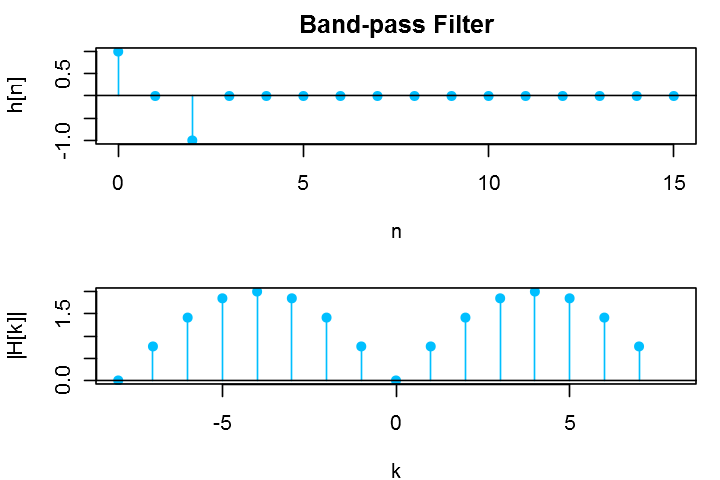

In [12]:
# band-pass filter
N <- 16
n <- 0:(N - 1)

h <- rep(0, N)
h[1] <- 1
h[2] <- 0
h[3] <- -1

kr <- c(seq(0, N / 2 - 1), seq(-N / 2, -1))
ks <- fftshift(kr)

ht <- fft(h)[1:N]  # fft(x, N) in matlab: N-point fft select N-point or padding 0 upto N-point
htshift <- fftshift(ht)

par(mfrow = c(2, 1), mar = c(4, 4, 2, 1))
plot(n, h, pch = 16, col = 'deepskyblue', main = 'Band-pass Filter',
     xlab = 'n', ylab = 'h[n]')
arrows(x0 = n, y0 = 0, x1 = n, y1 = h, col = 'deepskyblue', length = 0, angle = 0, lwd = 1)
abline(h = 0)

plot(ks, abs(htshift), pch = 16, col = 'deepskyblue', xlim = c(-N/2, N/2), xlab = 'k', ylab = '|H[k]|')
arrows(x0 = ks, y0 = 0, x1 = ks, y1 = abs(htshift), col = 'deepskyblue', length = 0, angle = 0, lwd = 1)
abline(h = 0)

### 4.2. FFT and Convolution

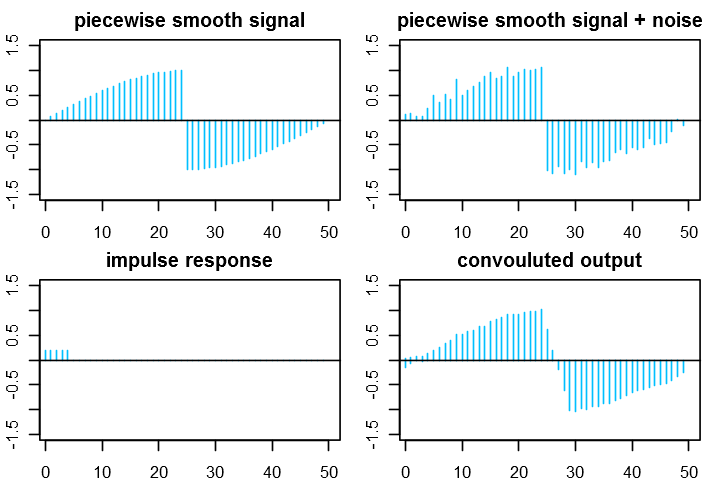

In [13]:
# piecewise smooth signal
N <- 50
n <- 0:(N - 1)

x <- sin(pi / N * n) * c(rep(1, N /2 ), rep(-1, N / 2))
xn <- x + 0.1 * rnorm(N)

# construct moving average filter impulse response of length M
M <- 5
h <- rep(0, N)
h[1:M] <- 1 / M

# convolve noisy signal with impulse response
conv <- function(x, y, conj = TRUE, type = c("circular", "open", "filter")){
  convolve(x, y[length(y):1], conj = conj, type = type)
}
y <- conv(xn, h, type = 'open')

par(mfrow = c(2, 2), mar = c(2, 2, 2, 1))
plot(x, pch = "", ylim = c(-1.5, 1.5), xlim = c(1, N), main = "piecewise smooth signal")
arrows(x0 = n, y0 = 0, x1 = n, y1 = x, col = 'deepskyblue', length = 0, angle = 0, lwd = 1)
abline(h = 0)

plot(xn, pch = "", ylim = c(-1.5, 1.5), xlim = c(1, N), main = "piecewise smooth signal + noise")
arrows(x0 = n, y0 = 0, x1 = n, y1 = xn, col = 'deepskyblue', length = 0, angle = 0, lwd = 1)
abline(h = 0)

plot(h, pch = "", ylim = c(-1.5, 1.5), xlim = c(1, N), main = "impulse response")
arrows(x0 = n, y0 = 0, x1 = n, y1 = h, col = 'deepskyblue', length = 0, angle = 0, lwd = 1)
abline(h = 0)

plot(y, pch = "", ylim = c(-1.5, 1.5), xlim = c(1, N), main = "convouluted output")
arrows(x0 = n, y0 = 0, x1 = n, y1 = y, col = 'deepskyblue', length = 0, angle = 0, lwd = 1)
abline(h = 0)

$$
\begin{align}
Y[k] &= H[k]X[k]\\
h[n] \otimes x[n] &\leftrightarrow H[k]X[k]\\
y[n] &= IDFT(Y[k])
\end{align}
$$

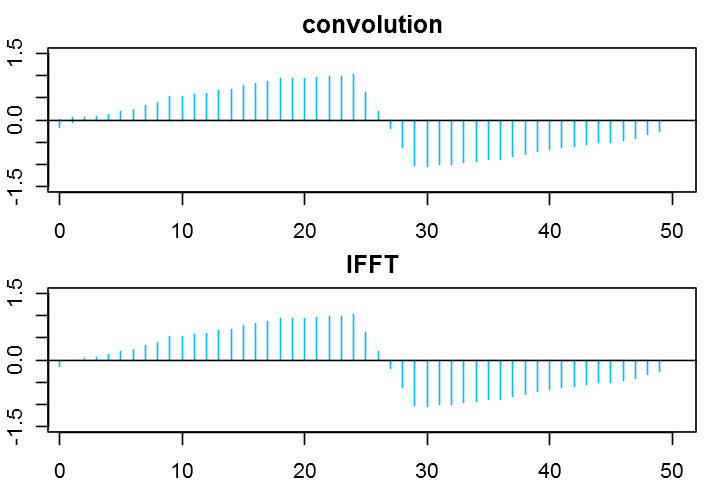

In [14]:
k <- 0:(N - 1)

ht <- fft(h)
xnt <- fft(xn)
ifft <- function(data) {
  Re(fft(data, inverse = T) / length(data))
}
xf <- ifft(ht * xnt)

par(mfrow = c(2, 1), mar = c(2, 2, 2, 1))
plot(y, pch = "", ylim = c(-1.5, 1.5), xlim = c(1, N), main = "convolution")
arrows(x0 = n, y0 = 0, x1 = n, y1 = y, col = 'deepskyblue', length = 0, angle = 0, lwd = 1)
abline(h = 0)

plot(k, xf, pch = "", ylim = c(-1.5, 1.5), xlim = c(1, N), main = "IFFT", xlab = 'k')
arrows(x0 = k, y0 = 0, x1 = k, y1 = xf, col = 'deepskyblue', length = 0, angle = 0, lwd = 1)
abline(h = 0)

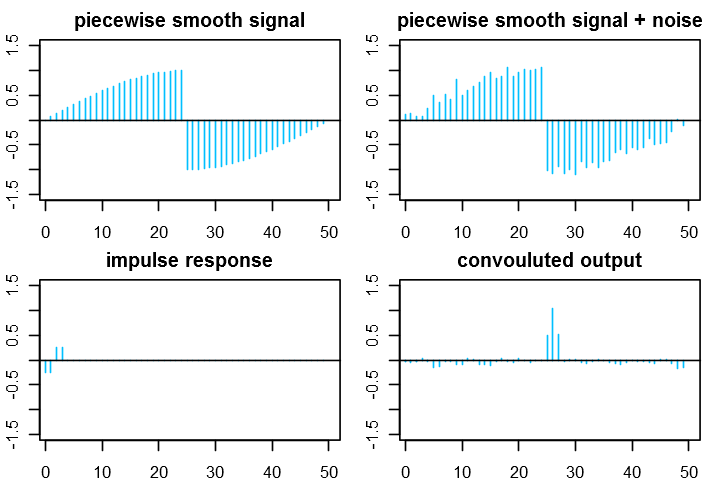

In [15]:
# haar wavelet edge detector
M <- 4
h <- rep(0, N)
h[1:2] <- -1 / M
h[3:4] <- 1 / M

# convolve noisy signal with impulse response
y <- conv(xn, h, type = 'open')

par(mfrow = c(2, 2), mar = c(2, 2, 2, 1))
plot(x, pch = "", ylim = c(-1.5, 1.5), xlim = c(1, N), main = "piecewise smooth signal")
arrows(x0 = n, y0 = 0, x1 = n, y1 = x, col = 'deepskyblue', length = 0, angle = 0, lwd = 1)
abline(h = 0)

plot(xn, pch = "", ylim = c(-1.5, 1.5), xlim = c(1, N), main = "piecewise smooth signal + noise")
arrows(x0 = n, y0 = 0, x1 = n, y1 = xn, col = 'deepskyblue', length = 0, angle = 0, lwd = 1)
abline(h = 0)

plot(h, pch = "", ylim = c(-1.5, 1.5), xlim = c(1, N), main = "impulse response")
arrows(x0 = n, y0 = 0, x1 = n, y1 = h, col = 'deepskyblue', length = 0, angle = 0, lwd = 1)
abline(h = 0)

plot(y, pch = "", ylim = c(-1.5, 1.5), xlim = c(1, N), main = "convouluted output")
arrows(x0 = n, y0 = 0, x1 = n, y1 = y, col = 'deepskyblue', length = 0, angle = 0, lwd = 1)
abline(h = 0)

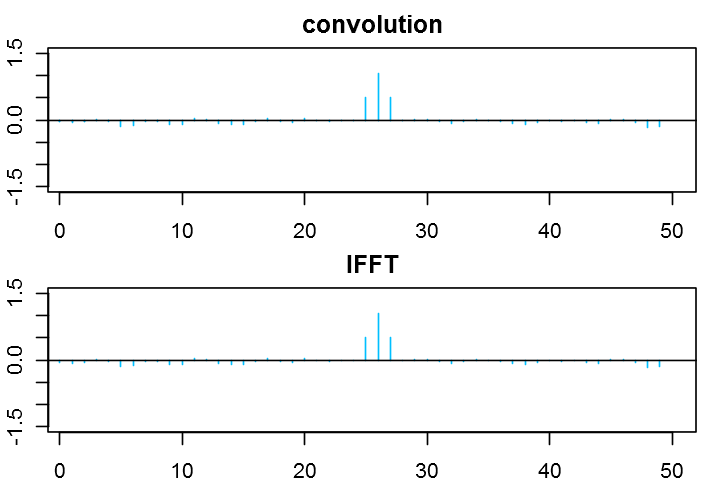

In [16]:
k <- 0:(N - 1)

ht <- fft(h)
xnt <- fft(xn)
xf <- ifft(ht * xnt)

par(mfrow = c(2, 1), mar = c(2, 2, 2, 1))
plot(y, pch = "", ylim = c(-1.5, 1.5), xlim = c(1, N), main = "convolution")
arrows(x0 = n, y0 = 0, x1 = n, y1 = y, col = 'deepskyblue', length = 0, angle = 0, lwd = 1)
abline(h = 0)

plot(k, xf, pch = "", ylim = c(-1.5, 1.5), xlim = c(1, N), main = "IFFT", xlab = 'k')
arrows(x0 = k, y0 = 0, x1 = k, y1 = xf, col = 'deepskyblue', length = 0, angle = 0, lwd = 1)
abline(h = 0)